Importing Libraries

In [3]:
import pandas as pd 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", message = ".*The figure layout has changed to tight.*")

In [4]:
weather_data = pd.read_csv("uk_climate.csv")

In [5]:
weather_data

,date,decade,year,season,month,day,day_of_year,temp,wind_speed,precipitation,surface_runoff,dewpoint_temp
0,01/01/1961,1960s,1961,winter,1,1,1,3.67336,4.489435,5.097336,0.145536,2.07498
1,02/01/1961,1960s,1961,winter,1,2,2,3.66230,4.753490,10.509815,0.339911,2.17663
2,03/01/1961,1960s,1961,winter,1,3,3,1.80944,4.907118,11.650104,0.243362,0.18316
3,04/01/1961,1960s,1961,winter,1,4,4,2.46017,4.978218,7.057683,0.148277,0.17916
4,05/01/1961,1960s,1961,winter,1,5,5,1.30547,3.921554,5.822474,0.178550,-0.36810
...,...,...,...,...,...,...,...,...,...,...,...,...
23371,27/12/2024,2020s,2024,winter,12,27,362,6.14584,1.775258,2.245387,0.044469,5.57534
23372,28/12/2024,2020s,2024,winter,12,28,363,6.00750,2.596544,2.441741,0.060964,5.17224
23373,29/12/2024,2020s,2024,winter,12,29,364,6.89740,4.751913,5.643503,0.177401,5.41985
23374,30/12/2024,2020s,2024,winter,12,30,365,7.03314,5.129574,17.551083,1.127203,5.33150


### Exploratory data analysis - numerical features
The first thing to know is what type of data has been collected.
.info() can tell us this:

In [6]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23376 entries, 0 to 23375
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            23376 non-null  object 
 1   decade          23376 non-null  object 
 2   year            23376 non-null  int64  
 3   season          23376 non-null  object 
 4   month           23376 non-null  int64  
 5   day             23376 non-null  int64  
 6   day_of_year     23376 non-null  int64  
 7   temp            23376 non-null  float64
 8   wind_speed      23376 non-null  float64
 9   precipitation   23376 non-null  float64
 10  surface_runoff  23376 non-null  float64
 11  dewpoint_temp   23376 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 2.1+ MB


In [8]:
weather_data['temp'].describe().round(2)

count    23376.00
mean         8.60
std          4.79
min         -7.21
25%          4.94
50%          8.64
75%         12.57
max         23.59
Name: temp, dtype: float64

Some of this information can also be visualized using a box plot

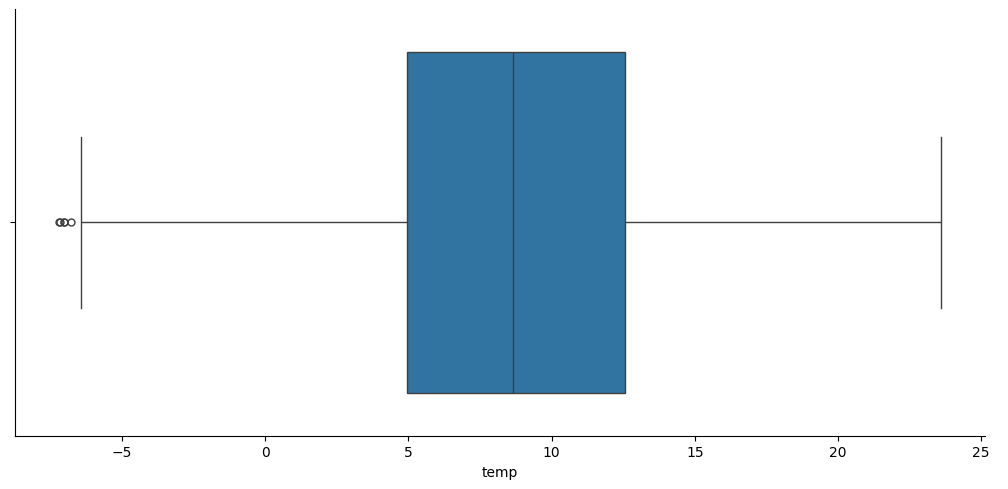

In [9]:
# Box plot for temp
sns.catplot(data= weather_data, kind='box', x= 'temp', aspect=2);

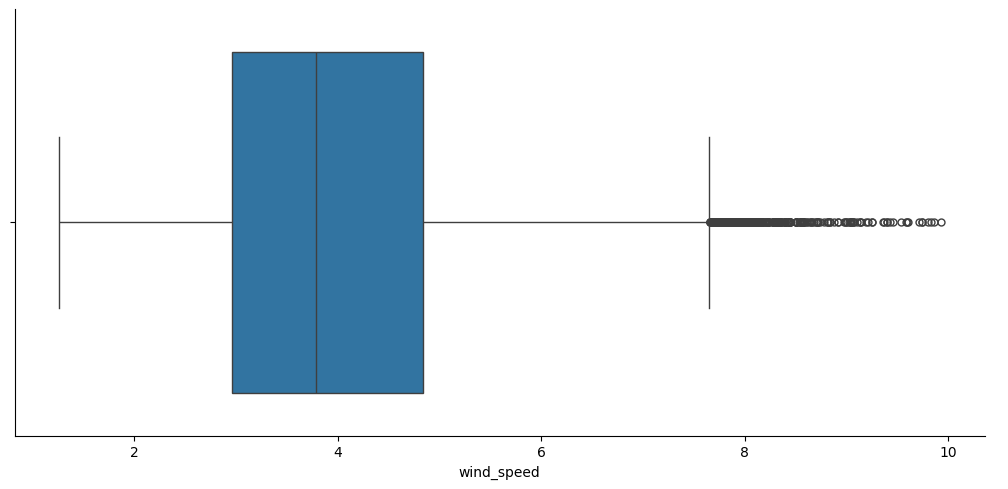

In [10]:
# Box plot for temp
sns.catplot(data= weather_data, kind='box', x= 'wind_speed', aspect=2);

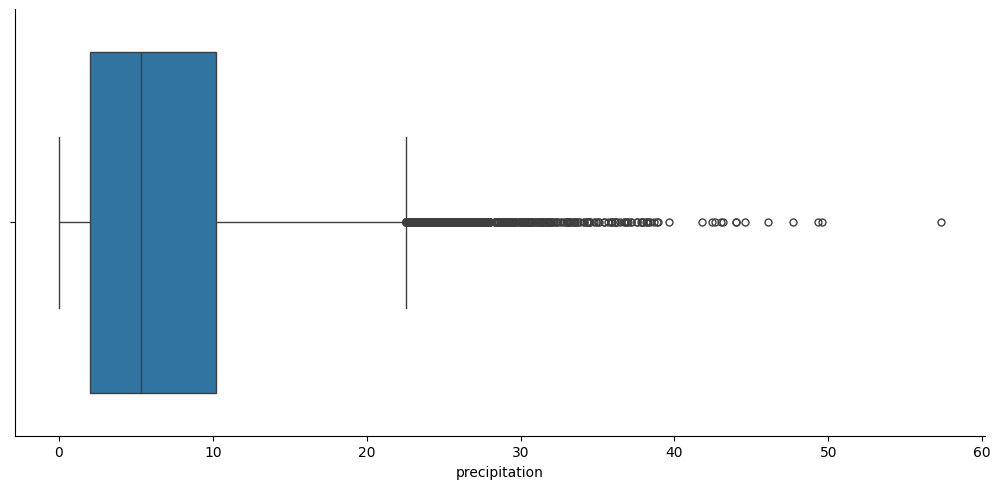

In [ ]:
# Box plot for precipitation
sns.catplot(data= weather_data, kind='box', x= 'precipitation', aspect=2);

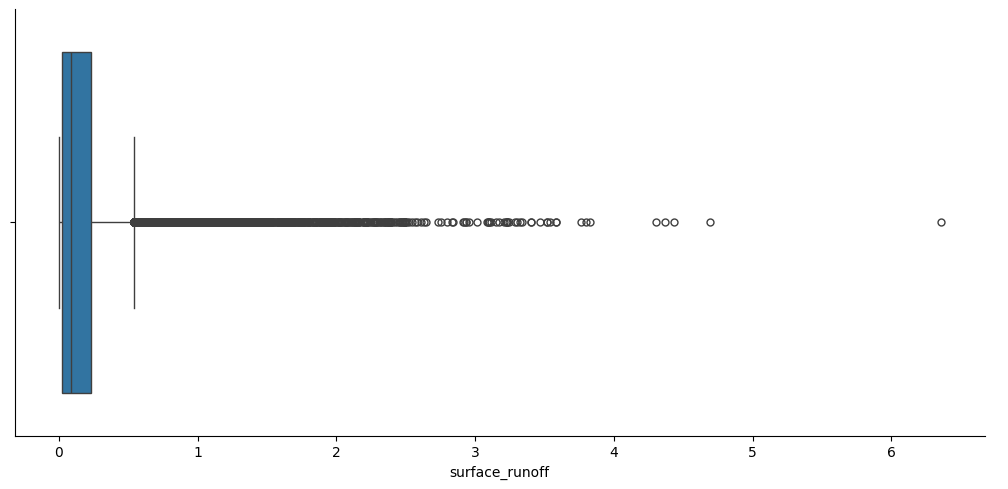

In [ ]:
# Box plot for surface_runoff
sns.catplot(data= weather_data, kind='box', x= 'surface_runoff', aspect=2);

### Exploratory data analysis - categorical features
So far you have only explored the numerical features of the data set. Categorical features such as season or decade need to be analysed in a different way.


.groupby() allow you to separate summary statistics by category

In [13]:
# Group the data by season and show statistics for temperature
weather_data.groupby('season')['temp'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
autumn,5824.0,9.41,3.53,-2.63,7.07,9.80,12.03,19.63
spring,5888.0,7.25,3.19,-3.41,5.00,7.25,9.45,17.95
summer,5888.0,14.01,2.12,6.28,12.60,13.92,15.34,23.59
winter,5776.0,3.66,2.96,-7.21,1.63,3.81,5.78,12.30


You can add a categorical feature to a box plot by including it on the y axis

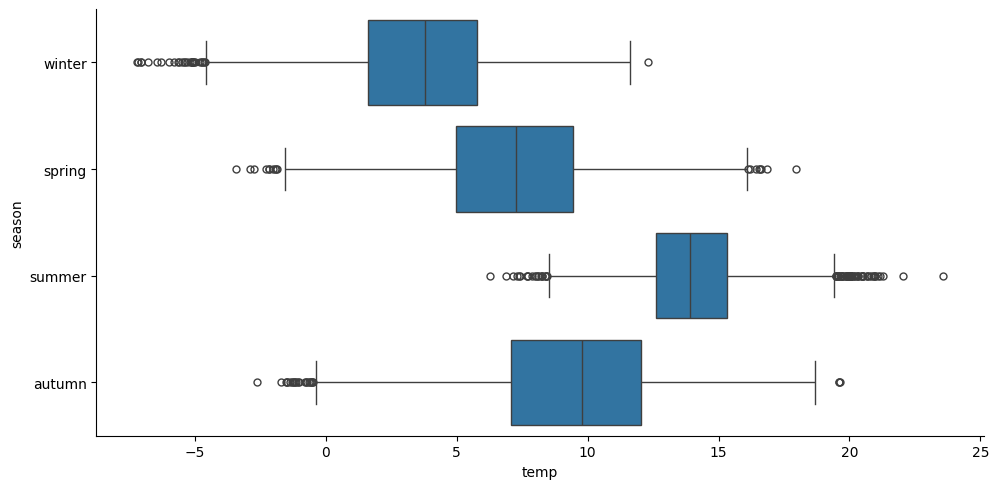

In [14]:
# Create box plot for daily average temprature, grouped by season
sns.catplot(data=weather_data, kind='box', x='temp', y='season', aspect=2);

In [15]:
# Group the data by season and show statistics for wind_speed
weather_data.groupby('season')['wind_speed'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
autumn,5824.0,4.12,1.36,1.26,3.07,3.95,4.99,9.46
spring,5888.0,3.93,1.28,1.41,2.97,3.74,4.69,9.37
summer,5888.0,3.46,1.04,1.35,2.67,3.35,4.14,7.85
winter,5776.0,4.52,1.58,1.39,3.29,4.31,5.60,9.92


In [17]:
# Group the data by season and show statistics for temperature
weather_data.groupby('season')['temp'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
autumn,5824.0,9.41,3.53,-2.63,7.07,9.80,12.03,19.63
spring,5888.0,7.25,3.19,-3.41,5.00,7.25,9.45,17.95
summer,5888.0,14.01,2.12,6.28,12.60,13.92,15.34,23.59
winter,5776.0,3.66,2.96,-7.21,1.63,3.81,5.78,12.30


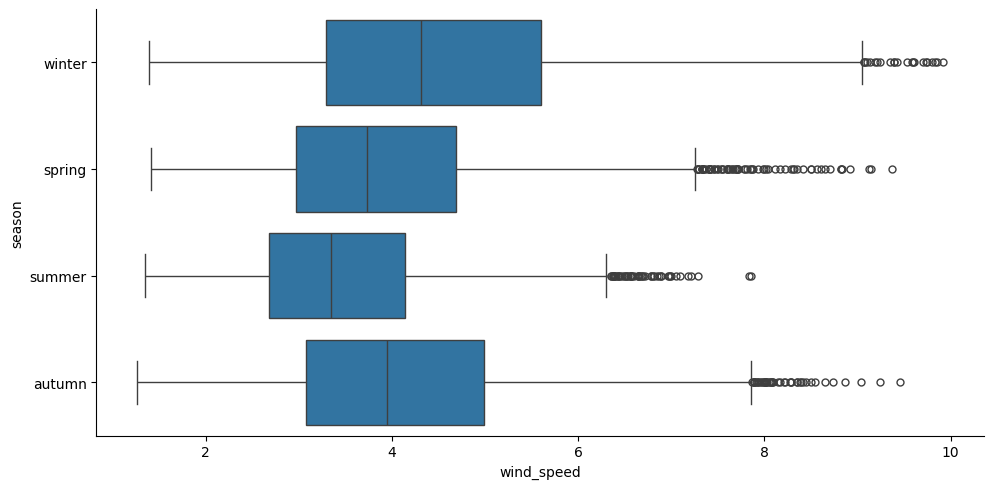

In [19]:
# Create box plots for wind_speed, grouped by season
sns.catplot(data=weather_data, x='wind_speed', y='season', kind='box', aspect=2);